In [6]:
import pandas as pd
import io
import matplotlib.pyplot as plt


df_post = pd.read_csv('/content/posts.csv')
print("Completed loading post.csv")

df_user = pd.read_csv('/content/users.csv')
print("Completed loading user.csv")

df_votes= pd.read_csv('/content/votes.csv')
print("Completed loading votes.csv")


df_user['creation_date'] = pd.to_datetime(df_user['creation_date'],errors='coerce',format='%Y-%m-%dT%H:%M:%S.%f')
df_post['creation_date'] = pd.to_datetime(df_post['creation_date'],errors='coerce',format='%Y-%m-%dT%H:%M:%S.%f')
df_post['closed_date'] = pd.to_datetime(df_post['closed_date'],format='%Y-%m-%dT%H:%M:%S.%f')
df_post['community_owned_date'] = pd.to_datetime(df_post['community_owned_date'],format='%Y-%m-%dT%H:%M:%S.%f')


df_votes['creation_date'] = pd.to_datetime(df_votes['creation_date'],errors='coerce',format='%Y-%m-%dT%H:%M:%S.%f')

print("----------------DATA TYPES of USER DATAFRAME-------------\n{}".format(df_user.dtypes))
print("----------------DATA TYPES of POST DATAFRAME-------------\n{}".format(df_post.dtypes))
print("----------------DATA TYPES of VOTE DATAFRAME-------------\n{}".format(df_votes.dtypes))

Completed loading post.csv
Completed loading user.csv
Completed loading votes.csv
----------------DATA TYPES of USER DATAFRAME-------------
Unnamed: 0                int64
id                        int64
reputation                int64
creation_date    datetime64[ns]
display_name             object
views                     int64
upvotes                   int64
downvotes                 int64
account_id                int64
dtype: object
----------------DATA TYPES of POST DATAFRAME-------------
Unnamed: 0                       int64
id                             float64
post_type_id                   float64
accepted_answer_id             float64
parent_id                      float64
creation_date           datetime64[ns]
score                          float64
view_count                     float64
owner_user_id                  float64
tags                            object
answer_count                   float64
comment_count                  float64
favorite_count                 f

In [7]:
df_answers =df_post[df_post['post_type_id']==2]
df_questions = df_post[df_post['post_type_id']==1]
df_questions = df_questions[df_questions['answer_count']!= 0]

In [8]:
time = df_answers['creation_date']- df_questions['creation_date']
print(time)
df_answers['Minutes'] = time
parent_groups = df_answers.groupby('parent_id')

0         NaT
1         NaT
2         NaT
3         NaT
4         NaT
           ..
3724892   NaT
3724893   NaT
3724894   NaT
3724895   NaT
3724896   NaT
Name: creation_date, Length: 3693207, dtype: timedelta64[ns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
id=[]
dateTime =[]
for rows,keys in parent_groups.groups.items():
  id.append(rows)
  dateTime.append(df_answers.loc[keys[0]]["creation_date"])
  

In [11]:
df_answers

,Unnamed: 0,id,post_type_id,accepted_answer_id,parent_id,creation_date,score,view_count,owner_user_id,tags,answer_count,comment_count,favorite_count,closed_date,community_owned_date,Minutes
2,2,7.0,2.0,-999.0,4.0,2008-07-31 22:17:57.883,84.0,0.0,9.0,NaN,0.0,0.0,0.0,NaT,NaT,NaT
6,6,12.0,2.0,-999.0,11.0,2008-07-31 23:56:41.303,70.0,0.0,1.0,NaN,0.0,7.0,0.0,NaT,2009-09-04 13:15:59.820,NaT
11,11,18.0,2.0,-999.0,17.0,2008-08-01 05:12:44.193,9.0,0.0,-999.0,NaN,0.0,2.0,0.0,NaT,NaT,NaT
13,13,20.0,2.0,-999.0,8.0,2008-08-01 07:25:22.443,3.0,0.0,5.0,NaN,0.0,0.0,0.0,NaT,NaT,NaT
14,14,21.0,2.0,-999.0,9.0,2008-08-01 08:57:27.280,2.0,0.0,13.0,NaN,0.0,0.0,0.0,NaT,2011-08-16 19:40:43.080,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3724891,3724891,4236898.0,2.0,-999.0,4236846.0,2010-11-21 07:40:20.030,1.0,0.0,497479.0,NaN,0.0,1.0,0.0,NaT,NaT,NaT
3724892,3724892,4236899.0,2.0,-999.0,4236887.0,2010-11-21 07:40:59.703,0.0,0.0,280598.0,NaN,0.0,0.0,0.0,NaT,NaT,NaT
3724893,3724893,4236900.0,2.0,-999.0,4236886.0,2010-11-21 07:41:08.923,3.0,0.0,156678.0,NaN,0.0,2.0,0.0,NaT,NaT,NaT
3724894,3724894,4236901.0,2.0,-999.0,4236784.0,2010-11-21 07:41:37.777,-3.0,0.0,147637.0,NaN,0.0,3.0,0.0,NaT,NaT,NaT


In [13]:
import pandas as pd
filtered_ans = pd.DataFrame({'id':id, 'Answer_Time':dateTime})

In [14]:
final_df = pd.merge(df_questions,filtered_ans,on=['id'])

In [15]:
final_df.head()

,Unnamed: 0,id,post_type_id,accepted_answer_id,parent_id,creation_date,score,view_count,owner_user_id,tags,answer_count,comment_count,favorite_count,closed_date,community_owned_date,Answer_Time
0,0,4.0,1.0,7.0,-999.0,2008-07-31 21:42:52.667,83.0,7351.0,8.0,<c#><winforms>,12.0,19.0,13.0,NaT,NaT,2008-07-31 22:17:57.883
1,1,6.0,1.0,31.0,-999.0,2008-07-31 22:08:08.620,20.0,1895.0,9.0,<html><css><internet-explorer-7>,5.0,4.0,1.0,NaT,NaT,2008-08-01 12:22:51.593
2,3,8.0,1.0,162.0,-999.0,2008-07-31 23:33:19.290,14.0,1124.0,9.0,<c#><conversion><j#>,3.0,0.0,1.0,NaT,NaT,2008-08-01 07:25:22.443
3,4,9.0,1.0,1404.0,-999.0,2008-07-31 23:40:59.743,207.0,44537.0,1.0,<c#><datetime>,30.0,4.0,102.0,NaT,2011-08-16 19:40:43.080,2008-08-01 08:57:27.280
4,5,11.0,1.0,1248.0,-999.0,2008-07-31 23:55:37.967,233.0,20416.0,1.0,<c#><.net><datetime><timespan>,34.0,9.0,204.0,NaT,2009-09-04 13:15:59.820,2008-07-31 23:56:41.303


In [16]:
final_df['new_Date'] = final_df['Answer_Time'] - final_df['creation_date']

In [17]:
import numpy as np
final_df['new_Date'] =final_df['new_Date']/np.timedelta64(1, 's')
final_df['new_Date'] = final_df['new_Date']/60


In [18]:
group_time = final_df.groupby("new_Date")

In [21]:
x_axis =[]
y_axis =[]
for i,j in group_time.groups.items():
  if i>=0 and i<=120:
    x_axis.append(i)
    y_axis.append(len(j))
print(len(x_axis))
print(len(y_axis))

474163
474163


In [24]:
#y_array =[]
#for i in y_axis:
  #y_new =(i/60000 *1000000)
  #y_array.append(y_new)

y_array =[]
y_array_ans =[]
cumm_Count = 0
cumm_Count_ans =0
for i in y_axis:
    y_avg =(i/10000)
    cumm_Count = y_avg+cumm_Count   
    y_array.append(cumm_Count)

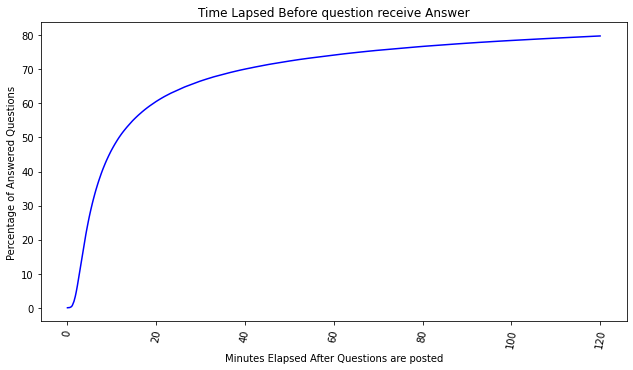

In [25]:
fig = plt.gcf()
fig.set_size_inches(10.5, 5.5)
plt.xticks(rotation=80)
plt.plot(x_axis,y_array,color='b',label='first answer')  

plt.title('Time Lapsed Before question receive Answer')
plt.xlabel('Minutes Elapsed After Questions are posted')
plt.ylabel('Percentage of Answered Questions')
plt.show()  